In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('future.no_silent_downcasting', True)

In [3]:
df = pd.read_csv("numba-user-survey-2024.scrubbed.csv", encoding="utf-8")

In [4]:
def extract_data_for_checkbox_question(start, end):
    # get all columns that contain data for question
    data = df[df.columns[start:end]]
    # get the first line, which contains the answer options
    options = list(data.iloc[0:1].iloc[0])
    # Create a mapping from old column names to new ones
    column_name_map = dict(zip(list(data), options))
    # Fixup the column names
    d = data.rename(columns=column_name_map)
    # Turn the object/string fields into numerical data
    d = d.replace(to_replace=options + [np.nan], value=[1] * len(options) + [0]).astype('float64')
    # strip the first line as it still conatins the answer options
    d = d.iloc[1:]
    # return final dataframe
    return d

In [5]:
def extract_data_for_ranking_question(start, end):
    # get all columns that contain data for question
    data = df[df.columns[start:end]]
    # get the first line, which contains the answer options
    options = list(data.iloc[0:1].iloc[0])
    # Create a mapping from old column names to new ones
    column_name_map = dict(zip(list(data), options))
    # Fixup the column names
    d = data.rename(columns=column_name_map)
    # strip the first line as it still conatins the answer options
    d = d.iloc[1:]
    d = d.astype("float64")
    # return final dataframe
    return d

In [6]:
def plot_checkbox_question(frame, title="TBD"):
    (frame.mean() * 100).plot.barh(title=title).invert_yaxis()

In [7]:
def plot_ranking_questions(frame, title="TBD", total_responses=137):
    ((((frame.sum() / total_responses) - 1) - 10) * -1).plot.barh().invert_yaxis()

# Q1

In [26]:
d1 = extract_data_for_checkbox_question(0, 7)

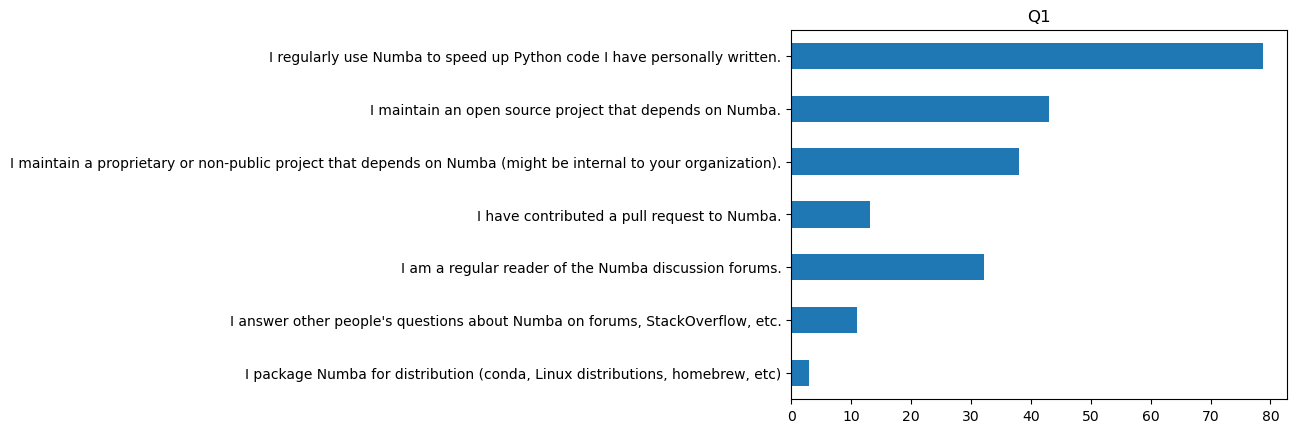

In [9]:
plot_checkbox_question(d1, title="Q1")

# Q2

In [10]:
d2 = extract_data_for_checkbox_question(7, 19)

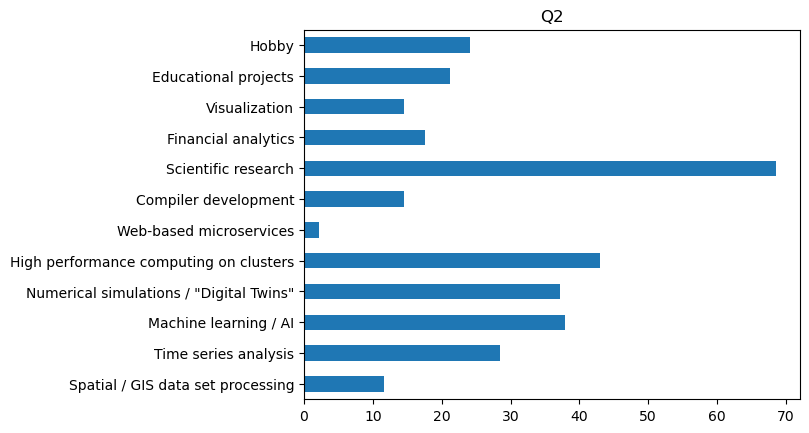

In [11]:
plot_checkbox_question(d2, title="Q2")

# Q3

In [12]:
d3 = extract_data_for_checkbox_question(19, 37)

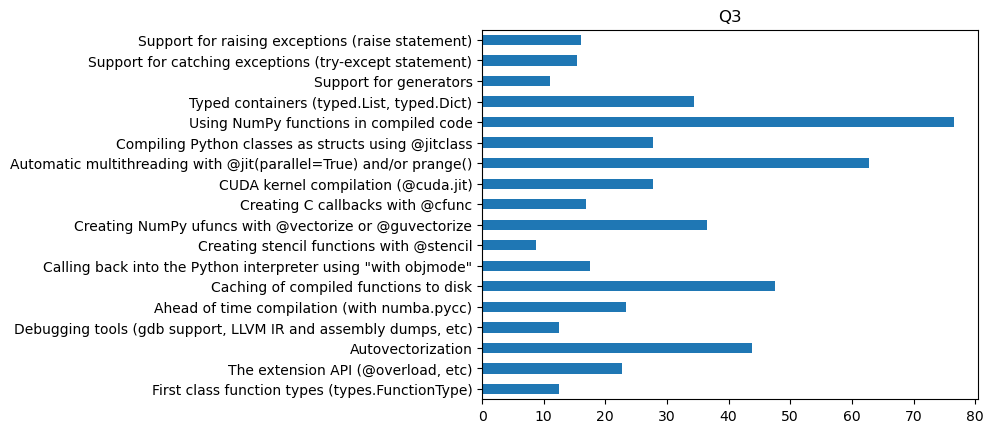

In [13]:
plot_checkbox_question(d3, title="Q3")

# Q4

In [14]:
d4 = extract_data_for_checkbox_question(37, 55)

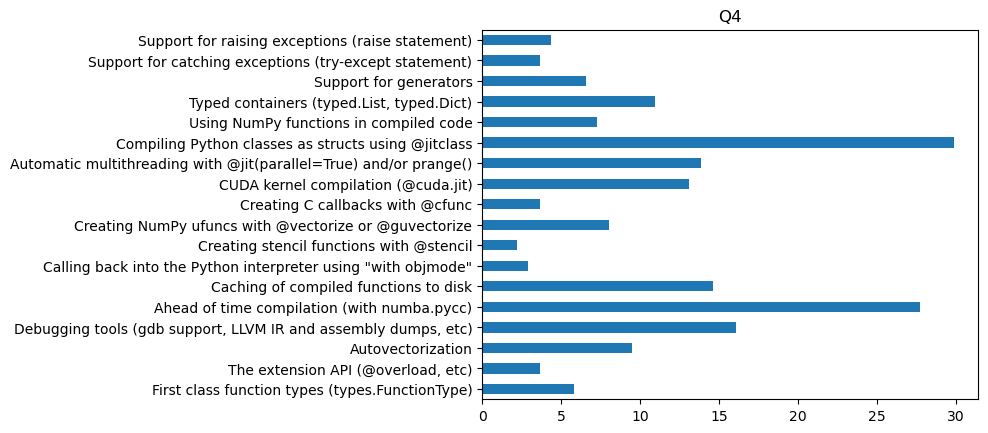

In [15]:
plot_checkbox_question(d4, title="Q4")

# Q5

In [16]:
d5 = extract_data_for_checkbox_question(55, 73)

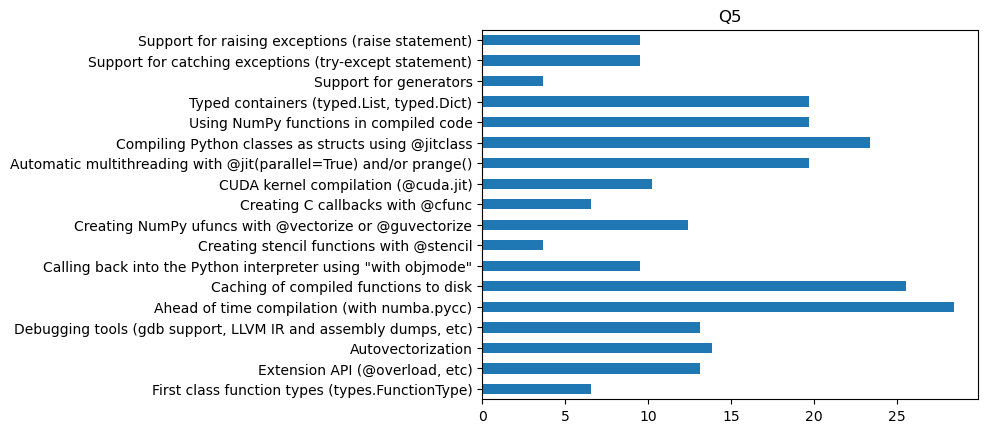

In [17]:
plot_checkbox_question(d5, title="Q5")

# Q6

In [18]:
d6 = extract_data_for_ranking_question(73, 83)

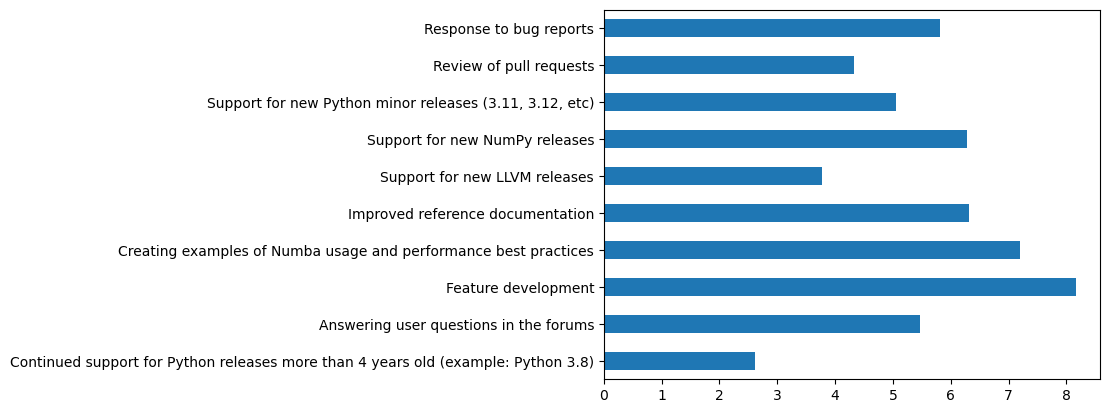

In [19]:
plot_ranking_questions(d6, title="Q6", total_responses=135)

# Q7

In [20]:
d7 = extract_data_for_ranking_question(83, 94)

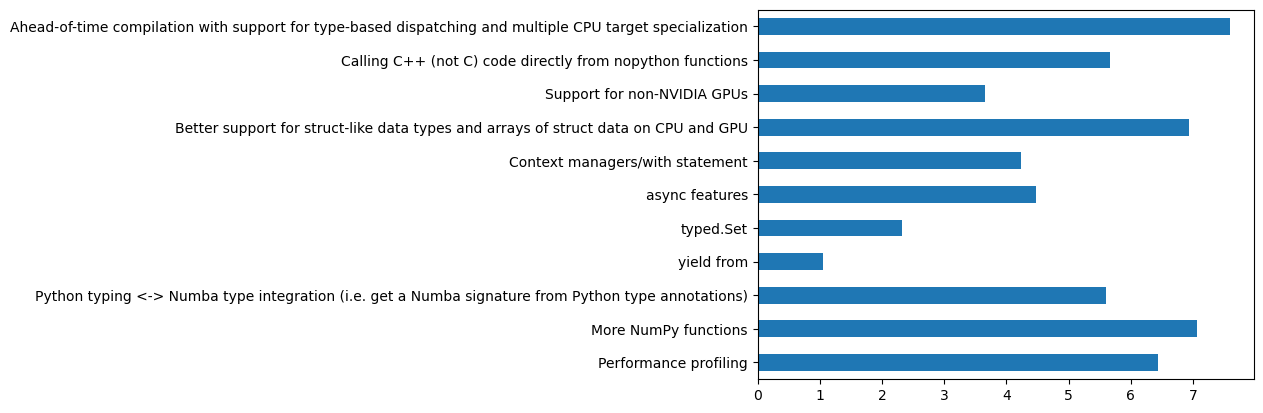

In [21]:
plot_ranking_questions(d7, title="Q7", total_responses=135)

# Q8

In [22]:
df[df.columns[94]].iloc[1:].replace(to_replace=["Yes", "No"], value=[1, 0]).sum()

10

# Q9

In [23]:
d9 = extract_data_for_checkbox_question(96, 100).astype(int)
d9.sum()

Learning about compilers                            4
Compiler research                                   4
Building Python compilers (other than Numba)        5
Building non-Python or domain specific compilers    5
dtype: int64

# Q10

In [24]:
d10 = extract_data_for_checkbox_question(100, 107)

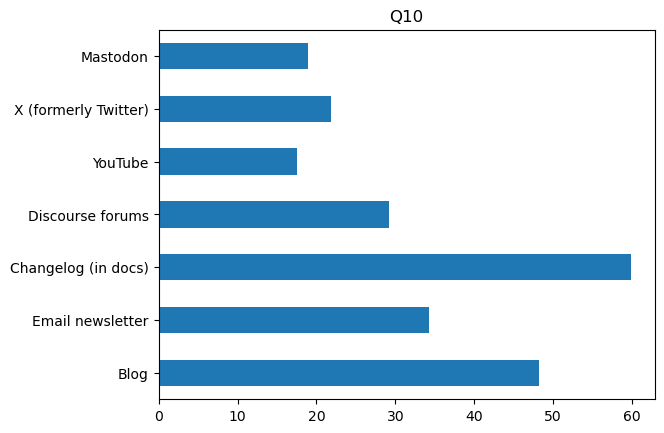

In [25]:
plot_checkbox_question(d10, title="Q10")